In [20]:
import numpy as np
import pandas as pd
import plotting_utils as pu

from utils import city_list
from utils import roar_code_path as project_code_path
from utils import roar_data_path as project_data_path
from utils import gev_metric_ids
import sa_city_utils as sacu

import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

In [2]:
# Set fonts
from matplotlib import font_manager
font_dirs = ["/storage/home/dcl5300/fonts"]

font_files = font_manager.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    font_manager.fontManager.addfont(font_file)
    
plt.rcParams["font.family"] = "sans-serif"
plt.rcParams["font.size"] = 12
plt.rcParams["font.sans-serif"] = "Arial"
plt.rcParams["pdf.fonttype"] = 42
plt.rcParams["axes.linewidth"] = 1.5

## Get city data

In [4]:
%%time
# Original grids
grid = "original"
proj_slice = "2050-2100"
hist_slice = "1950-2014"
stationary = True
fit_method = "lmom"
cols_to_keep = ["20yr_return_level", "50yr_return_level", "100yr_return_level", "200yr_return_level"]
col_identifier = "return_levels"

for metric_id in gev_metric_ids:
    sacu.store_all_cities(
        metric_id=metric_id,
        grid=grid,
        regrid_method=None,
        proj_slice=proj_slice,
        hist_slice=hist_slice,
        stationary=stationary,
        fit_method=fit_method,
        cols_to_keep=cols_to_keep,
        col_identifier=col_identifier,
        city_list=city_list,
    )

CPU times: user 1.11 ms, sys: 1.07 ms, total: 2.18 ms
Wall time: 16.4 ms


In [5]:
%%time
# LOCA2 grid
grid = "LOCA2"
regrid_method = "nearest"
proj_slice = "2050-2100"
hist_slice = "1950-2014"
stationary = True
fit_method = "lmom"
cols_to_keep = ["20yr_return_level", "50yr_return_level", "100yr_return_level", "200yr_return_level"]
col_identifier = "return_levels"

for metric_id in gev_metric_ids:
    sacu.store_all_cities(
        metric_id=metric_id,
        grid=grid,
        regrid_method=regrid_method,
        proj_slice=proj_slice,
        hist_slice=hist_slice,
        stationary=stationary,
        fit_method=fit_method,
        cols_to_keep=cols_to_keep,
        col_identifier=col_identifier,
        city_list=city_list,
    )

CPU times: user 1.82 ms, sys: 0 ns, total: 1.82 ms
Wall time: 13 ms


## Plots

### Single model example

In [5]:
### Single model example
metric_id = "max_pr"
grid = "original"
proj_slice = "2050-2100"
hist_slice = "1950-2014"
stationary = True
stat_str = "stat" if stationary else "nonstat"
fit_method = "lmom"
cols_to_keep = ["20yr_return_level", "50yr_return_level", "100yr_return_level", "200yr_return_level"]
col_identifier = "return_levels"

city = "nyc"

df = pd.read_csv(f"{project_data_path}/extreme_value/cities/original_grid/freq/{city}_{metric_id}_{proj_slice}_{hist_slice}_{col_identifier}_{fit_method}_{stat_str}.csv")

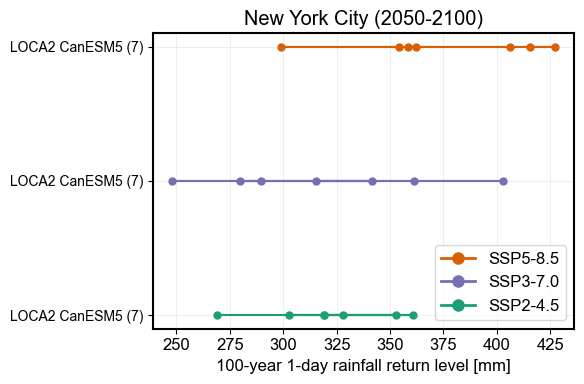

In [19]:
# Select example
plt.rcParams.update({'font.size': 12})

gcm = "CanESM5"
ensemble = "LOCA2"

df_sel = df[(df["gcm"] == gcm) & (df["ensemble"] == ensemble)]

fig, ax = plt.subplots(figsize=(6,4))

pu.plot_boxplot_all(df=df_sel,
                    plot_col = "100yr_return_level",
                    xlabel = "100-year 1-day rainfall return level [mm]",
                    title = "New York City (2050-2100)",
                    ax=ax)
plt.tight_layout()
plt.savefig('../figs/nyc_max_pr_example.pdf')

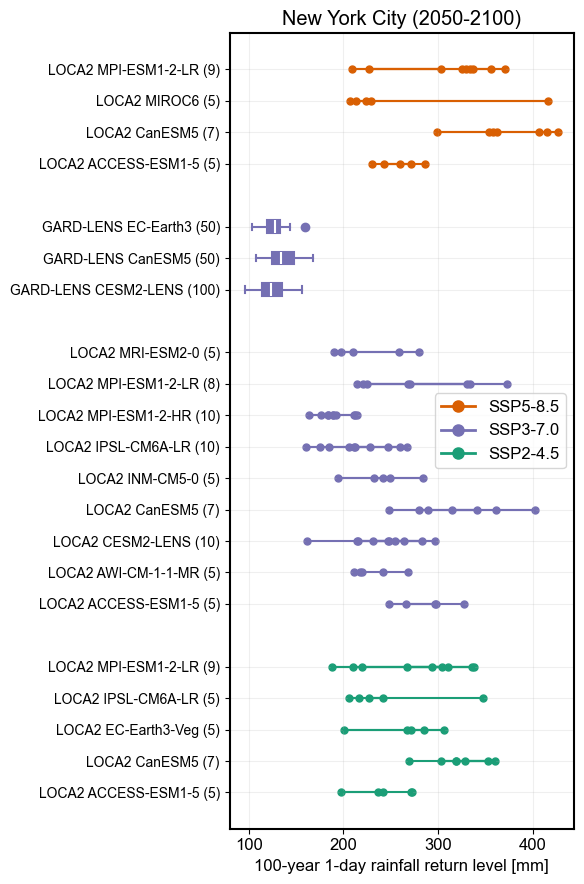

In [20]:
# All
plt.rcParams.update({'font.size': 12})

df_sel = df[(df["ssp"] != "historical") & (df["ensemble"] != "STAR-ESDM")]

fig, ax = plt.subplots(figsize=(6,9))

pu.plot_boxplot_all(df=df_sel,
                    plot_col = "100yr_return_level",
                    xlabel = "100-year 1-day rainfall return level [mm]",
                    title = "New York City (2050-2100)",
                    ax=ax)
plt.tight_layout()
plt.savefig('../figs/nyc_max_pr_example_all.pdf')

### Breakdown by uncertainty source

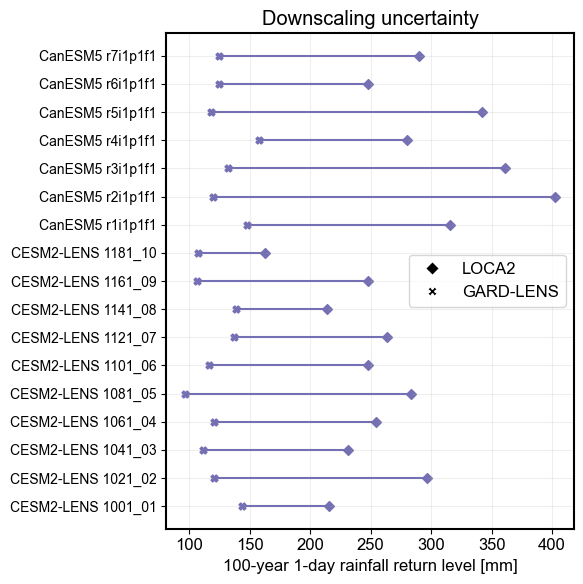

In [3]:
# Read
metric_id = "max_pr"
grid = "original"
proj_slice = "2050-2100"
hist_slice = "1950-2014"
stationary = True
stat_str = "stat" if stationary else "nonstat"
fit_method = "lmom"
cols_to_keep = ["20yr_return_level", "50yr_return_level", "100yr_return_level", "200yr_return_level"]
col_identifier = "return_levels"

city = "nyc"

df = pd.read_csv(f"{project_data_path}/extreme_value/cities/original_grid/freq/{city}_{metric_id}_{proj_slice}_{hist_slice}_{col_identifier}_{fit_method}_{stat_str}.csv")
df_sel = df[df["ssp"] == "ssp370"]

# Plot
fig, ax = plt.subplots(figsize=(6,6))

pu.plot_ds_differences(df = df_sel,
                       plot_col = "100yr_return_level",
                       xlabel = "100-year 1-day rainfall return level [mm]",
                       ssp_legend=False, ax=ax)

plt.tight_layout()
plt.savefig('../figs/nyc_example_ds_uncertainty.pdf')

### Validation

In [51]:
# Read
metric_id = "max_pr"
proj_slice = "2050-2100"
hist_slice = "1950-2014"
stationary = True
stat_str = "stat" if stationary else "nonstat"
fit_method = "lmom"
cols_to_keep = ["20yr_return_level", "50yr_return_level", "100yr_return_level", "200yr_return_level"]
col_identifier = "return_levels"

city = "nyc"

df_locagrid = pd.read_csv(f"{project_data_path}/extreme_value/cities/loca_grid/{city}_{metric_id}_{proj_slice}_{hist_slice}_{col_identifier}_{fit_method}_{stat_str}_nearest.csv")
df_locagrid_sel = df_locagrid[df_locagrid['ssp'] != 'historical']

df_origgrid = pd.read_csv(f"{project_data_path}/extreme_value/cities/original_grid/freq/{city}_{metric_id}_{proj_slice}_{hist_slice}_{col_identifier}_{fit_method}_{stat_str}.csv")
df_origgrid_sel = df_origgrid[df_origgrid['ssp'] != 'historical']

In [69]:
df_sel = df_origgrid_sel.copy()

min_members = 5
plot_col = "100yr_return_level"
get_range = lambda x: x.max() - x.min()
combos_to_include = df_sel.groupby(['ensemble', 'gcm', 'ssp']).count()[plot_col] >= min_members

# Scenario uncertainty
ssp_uc = df_sel.groupby(['ensemble', 'gcm', 'ssp'])[plot_col].mean().loc[combos_to_include].groupby(['gcm', 'ensemble']).apply(get_range).replace(0., np.nan).mean()
ssp_uc = df_sel.groupby(['ensemble', 'ssp'])[plot_col].mean().groupby('ensemble').apply(get_range).replace(0., np.nan).mean()

# Response uncertainty
gcm_uc = df_sel.groupby(['ensemble', 'gcm', 'ssp'])[plot_col].mean().loc[combos_to_include].groupby(['ssp', 'ensemble']).apply(get_range).replace(0., np.nan).mean()

# Internal variability
iv_uc = df_sel.groupby(['ensemble', 'gcm', 'ssp'])[plot_col].apply(get_range).loc[combos_to_include].replace(0., np.nan).mean()

# Downscaling uncertainty
ds_uc = df_sel.groupby(['gcm', 'ssp', 'member'])[plot_col].apply(get_range).replace(0., np.nan).mean()

In [70]:
ssp_uc

32.36495405492008

In [64]:
ssp_uc, gcm_uc, iv_uc, ds_uc

(41.58860677955133, 83.35685212422408, 105.48790018642413, 129.22165006359572)

In [56]:
import xarray as xr

In [57]:
# Check against map
ds_uc = xr.open_dataset(f'{project_data_path}/results/{metric_id}_{proj_slice}_None_{plot_col}_{fit_method}_{stat_str}_LOCA2grid_nearest.nc')

In [62]:
df_sel[plot_col].quantile(0.975) - df_sel[plot_col].quantile(0.025)

287.99735484300334

In [58]:
ds_uc.sel(lat=city_list[city][0], lon=360+city_list[city][1], method='nearest').load()

<xarray.Dataset> Size: 72B
Dimensions:   ()
Coordinates:
    lon       float64 8B 286.0
    lat       float64 8B 40.72
Data variables:
    gcm_uc    float64 8B 83.36
    ssp_uc    float64 8B 32.36
    iv_uc     float64 8B 105.5
    dsc_uc    float64 8B 129.2
    uc_range  float64 8B 349.0
    uc_99w    float64 8B 337.3
    uc_95w    float64 8B 288.0

### Other

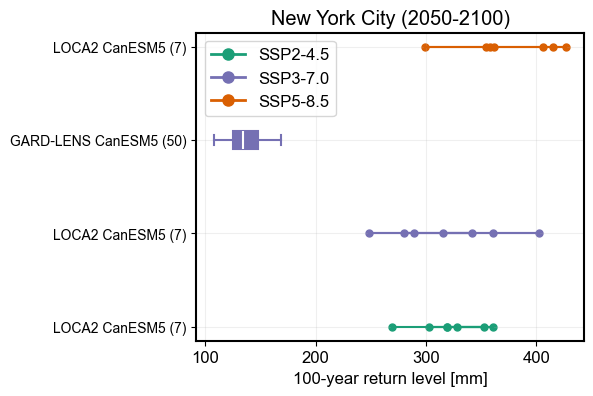

In [21]:
# Select example
gcm = "CanESM5"
ensemble = "LOCA2"

df_sel = df[(df["gcm"] == gcm)]

fig, ax = plt.subplots(figsize=(5,4))

pu.plot_boxplot_all(df=df_sel,
                    plot_col = "100yr_return_level",
                    xlabel = "100-year return level [mm]",
                    title = "New York City (2050-2100)",
                    ax=ax
                   )
plt.show()

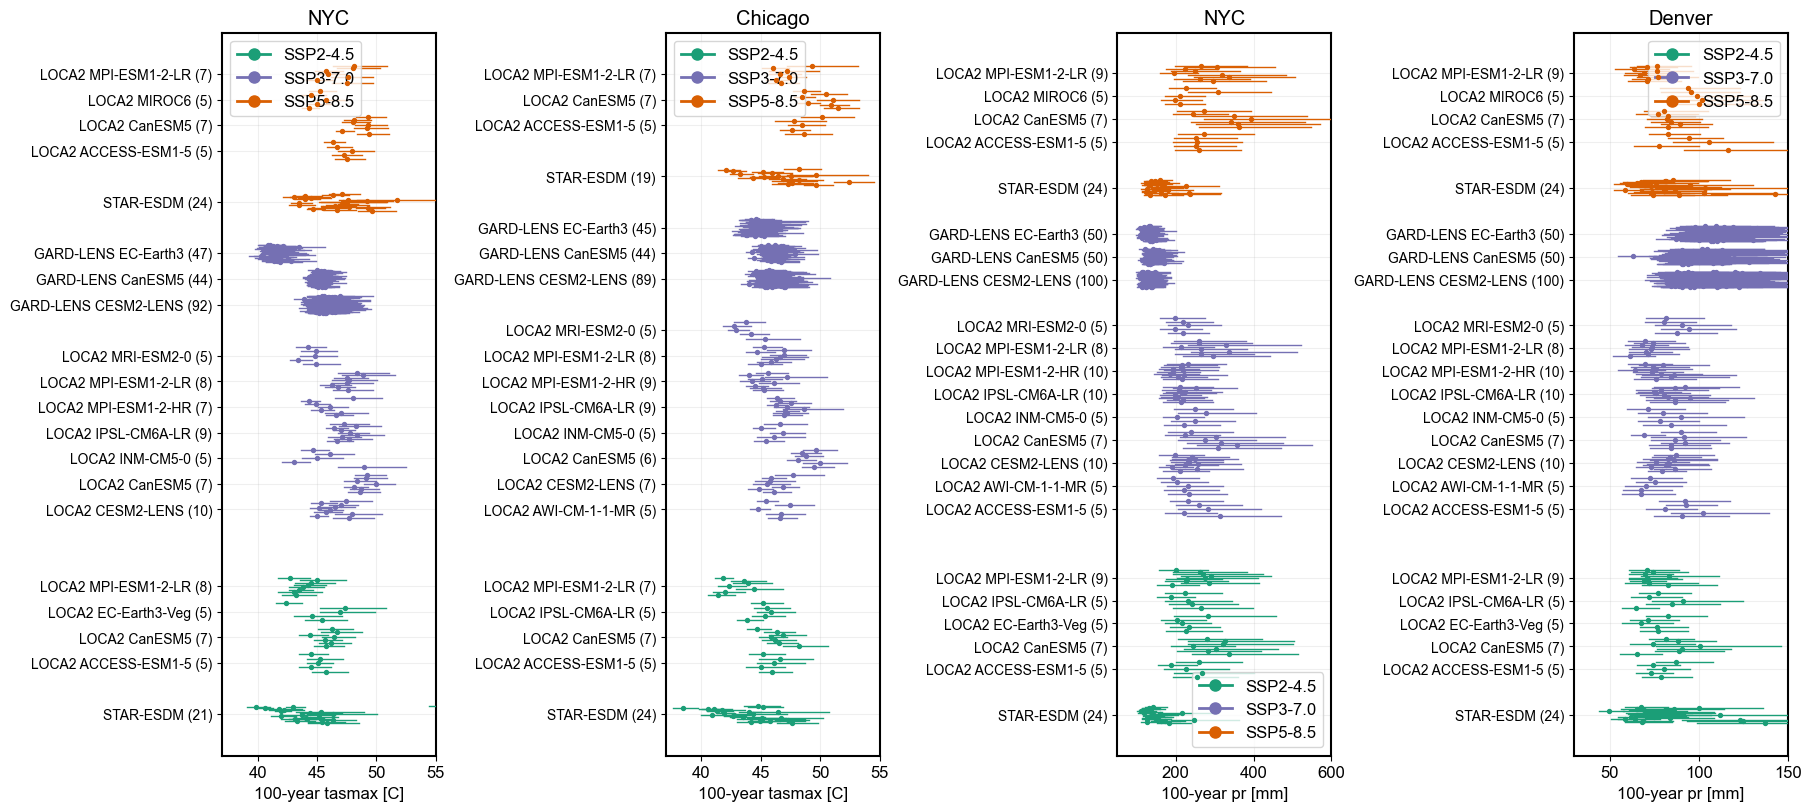

In [7]:
## Bayesian
store_path = f"{project_data_path}/extreme_value/cities/original_grid/bayes_combined/"

stationary = False
stationary_string = "stat" if stationary else "nonstat"

prior_identifier = "shape_sigma_02"
year = 2100
change_identifier = "" #"_change_2015-2100"

fig, axs = plt.subplots(1,4, figsize=(18,8), sharey=False, layout='constrained')

# NYC heat
city = 'nyc'
metric_id = 'max_tasmax'

df = pd.read_csv(f"{store_path}/{city}_{metric_id}_{stationary_string}_{prior_identifier}{change_identifier}.csv")
df_plot = df[(df["ssp"] != "historical") & df["rhat_good"]]
if year is not None:
    df_plot = df_plot[df_plot["time"] == year]

pu.plot_boxplot_all_bayes(df = df_plot, 
                       plot_col = '100yr_return_level',
                       xlabel = '100-year tasmax [C]',
                       title = 'NYC',
                       min_members = 5,
                       lw = 1,
                       s = 8,
                       idx_step = 1,
                       ax=axs[0]
                      )
axs[0].set_xlim([37,55])

# Chicago heat
city = 'chicago'
metric_id = 'max_tasmax'

df = pd.read_csv(f"{store_path}/{city}_{metric_id}_{stationary_string}_{prior_identifier}{change_identifier}.csv")
df_plot = df[(df["ssp"] != "historical") & df["rhat_good"]]
if year is not None:
    df_plot = df_plot[df_plot["time"] == year]
    
pu.plot_boxplot_all_bayes(df = df_plot, 
                       plot_col = '100yr_return_level',
                       xlabel = '100-year tasmax [C]',
                       title = 'Chicago',
                       min_members = 5,
                       lw = 1,
                       s = 8,
                       idx_step = 1,
                       ax=axs[1]
                      )
axs[1].set_xlim([37,55])

# NYC pr
city = 'nyc'
metric_id = 'max_pr'

df = pd.read_csv(f"{store_path}/{city}_{metric_id}_{stationary_string}_{prior_identifier}{change_identifier}.csv")
df_plot = df[(df["ssp"] != "historical") & df["rhat_good"]]
if year is not None:
    df_plot = df_plot[df_plot["time"] == year]
    
pu.plot_boxplot_all_bayes(df = df_plot, 
                       plot_col = '100yr_return_level',
                       xlabel = '100-year pr [mm]',
                       title = 'NYC',
                       min_members = 5,
                       lw = 1,
                       s = 8,
                       idx_step = 1,
                       ax=axs[2]
                      )

axs[2].set_xlim([50,600])

# Denver pr
city = 'denver'
metric_id = 'max_pr'

df = pd.read_csv(f"{store_path}/{city}_{metric_id}_{stationary_string}_{prior_identifier}{change_identifier}.csv")
df_plot = df[(df["ssp"] != "historical") & df["rhat_good"]]
if year is not None:
    df_plot = df_plot[df_plot["time"] == year]
    
pu.plot_boxplot_all_bayes(df = df_plot, 
                       plot_col = '100yr_return_level',
                       xlabel = '100-year pr [mm]',
                       title = 'Denver',
                       min_members = 5,
                       lw = 1,
                       s = 8,
                       idx_step = 1,
                       ax=axs[3]
                      )

axs[3].set_xlim([30,200])

plt.show()

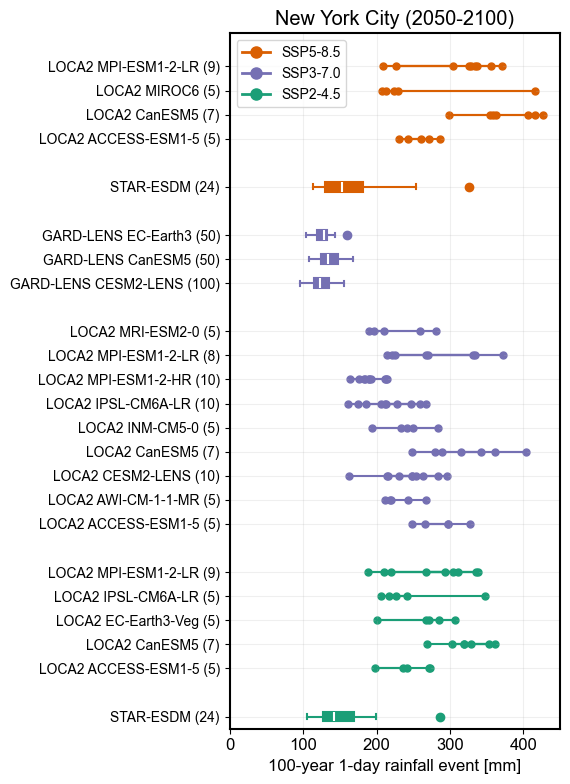

In [26]:
fig, ax = plt.subplots(figsize=(6,8))

pu.plot_city('nyc', 'max_pr', 100, ax, "100-year 1-day rainfall event [mm]", "New York City (2050-2100)", True, min_members=5, limits=[0,400])

legend_elements = [
            Line2D(
                [0],
                [0],
                color=ssp_colors[ssp],
                marker="o",
                markerfacecolor=ssp_colors[ssp],
                markersize=8,
                lw=2,
                label=ssp_labels[ssp],
            )
            for ssp in list(ssp_colors.keys())[::-1]
        ]
ax.legend(handles=legend_elements, loc='upper left', fontsize=10)
ax.set_xlim([0,450])
plt.tight_layout()

plt.savefig('../figs/nyc_pr_rl100.png', dpi=300)

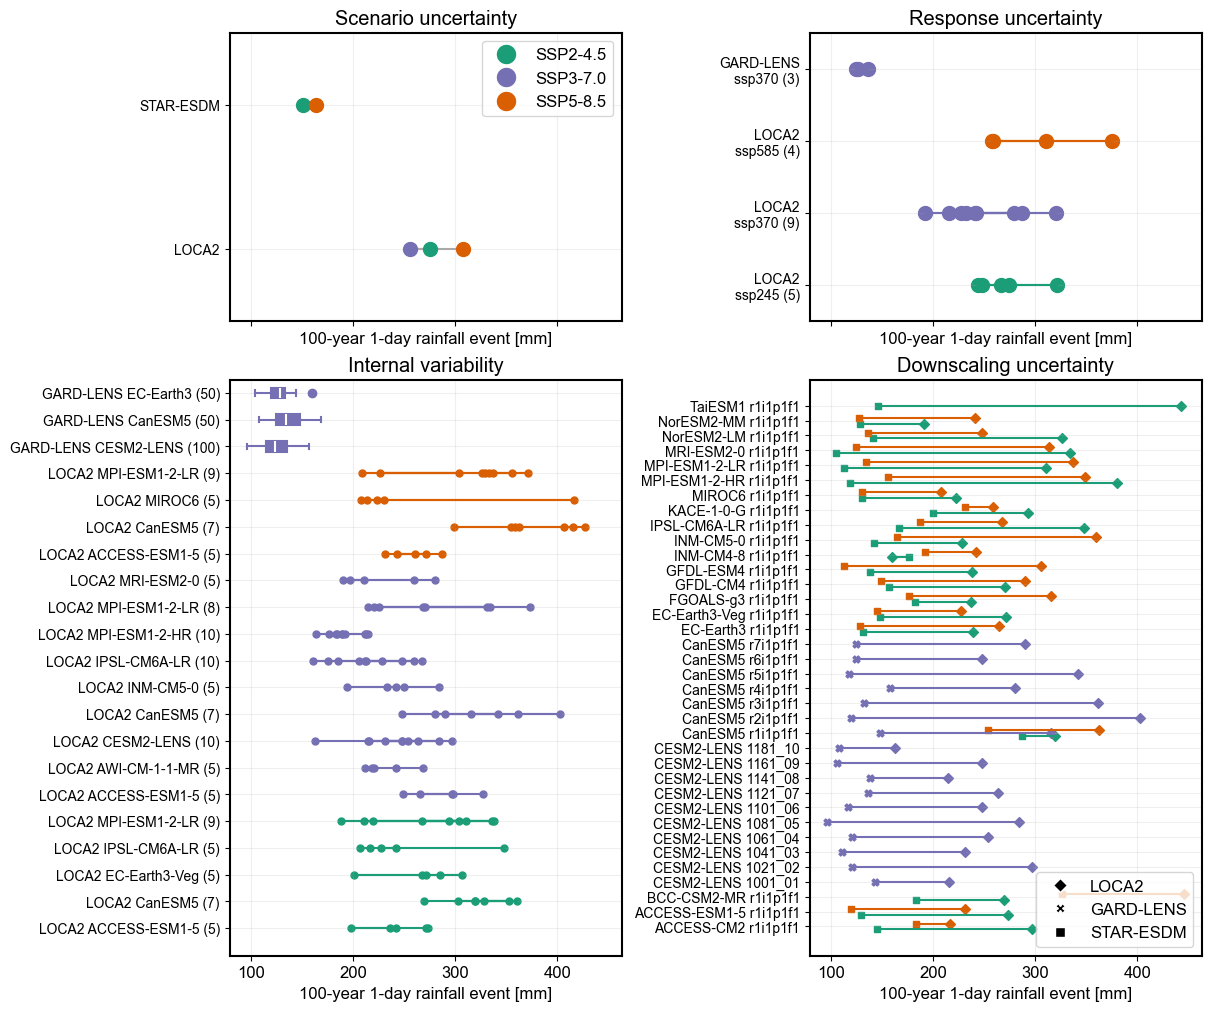

In [37]:
# Read all
metric_id = 'max_pr'
xlabel = "100-year 1-day rainfall event [mm]"
regrid_method = 'nearest'
proj_slice = '2050-2100'
hist_slice = '1950-2014'
return_period = 100

# Read
city = 'nyc'
file_name = f"{city}_{metric_id}_{proj_slice}_{hist_slice}_{return_period}rl_{regrid_method}.csv"
df_all = pd.read_csv(f"{project_data_path}/extreme_value/cities/loca_grid/{file_name}")

# Plot
plot_col = "100yr_return_level"

pu.plot_decomp_qual(df = df_all[df_all['ssp'] != 'historical'],
                 plot_col = plot_col,
                 xlabel = xlabel)

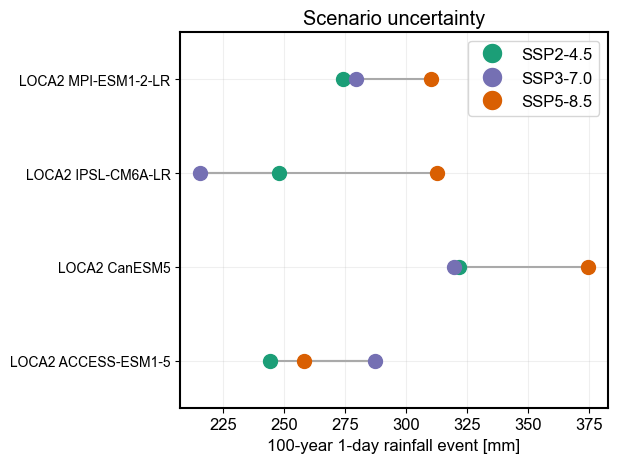

In [19]:
# Read all
metric_id = 'max_pr'
xlabel = "100-year 1-day rainfall event [mm]"
regrid_method = 'nearest'
proj_slice = '2050-2100'
hist_slice = '1950-2014'
return_period = 100

# Read
city = 'nyc'
file_name = f"{city}_{metric_id}_{proj_slice}_{hist_slice}_{return_period}rl_{regrid_method}.csv"
df_all = pd.read_csv(f"{project_data_path}/extreme_value/cities/loca_grid/{file_name}")

# Plot
plot_col = "100yr_return_level"

fig, ax = plt.subplots()

pu.plot_scenario_differences_by_gcm(df_all[df_all['ssp'] != 'historical'], plot_col, xlabel, ax=ax)
plt.tight_layout()
plt.savefig('../figs/nyc_example_scenario_uncertainty.png', dpi=300)

# pu.plot_decomp_qual(df = df_all[df_all['ssp'] != 'historical'],
#                  plot_col = plot_col,
#                  xlabel = xlabel)

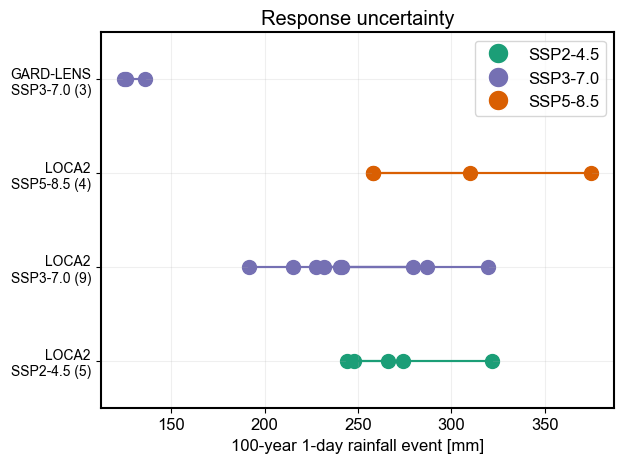

In [18]:
# Read all
metric_id = 'max_pr'
xlabel = "100-year 1-day rainfall event [mm]"
regrid_method = 'nearest'
proj_slice = '2050-2100'
hist_slice = '1950-2014'
return_period = 100

# Read
city = 'nyc'
file_name = f"{city}_{metric_id}_{proj_slice}_{hist_slice}_{return_period}rl_{regrid_method}.csv"
df_all = pd.read_csv(f"{project_data_path}/extreme_value/cities/loca_grid/{file_name}")

# Plot
plot_col = "100yr_return_level"

fig, ax = plt.subplots()

pu.plot_response_differences(df_all[df_all['ssp'] != 'historical'], plot_col, xlabel, ax=ax, legend=True)
plt.tight_layout()
plt.savefig('../figs/nyc_example_response_uncertainty.png', dpi=300)

# pu.plot_decomp_qual(df = df_all[df_all['ssp'] != 'historical'],
#                  plot_col = plot_col,
#                  xlabel = xlabel)

In [12]:
np.mean([20,120, 120, 80])

85.0

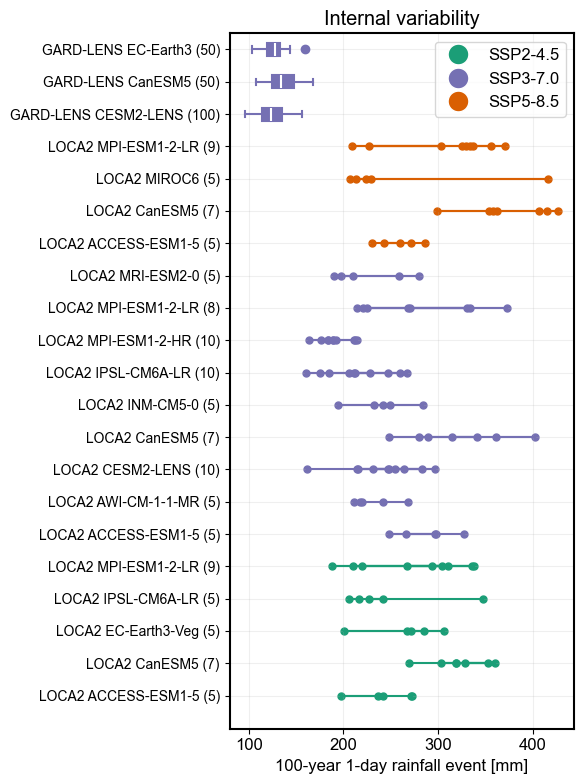

In [6]:
# Read all
metric_id = 'max_pr'
xlabel = "100-year 1-day rainfall event [mm]"
regrid_method = 'nearest'
proj_slice = '2050-2100'
hist_slice = '1950-2014'
return_period = 100

# Read
city = 'nyc'
file_name = f"{city}_{metric_id}_{proj_slice}_{hist_slice}_{return_period}rl_{regrid_method}.csv"
df_all = pd.read_csv(f"{project_data_path}/extreme_value/cities/loca_grid/{file_name}")

# Plot
plot_col = "100yr_return_level"

fig, ax = plt.subplots(figsize=(6,8))

pu.plot_iv_differences(df_all[df_all['ssp'] != 'historical'], plot_col, xlabel, ax=ax, legend=True)

plt.tight_layout()
plt.savefig('../figs/nyc_example_iv_uncertainty.png', dpi=300)

# pu.plot_decomp_qual(df = df_all[df_all['ssp'] != 'historical'],
#                  plot_col = plot_col,
#                  xlabel = xlabel)

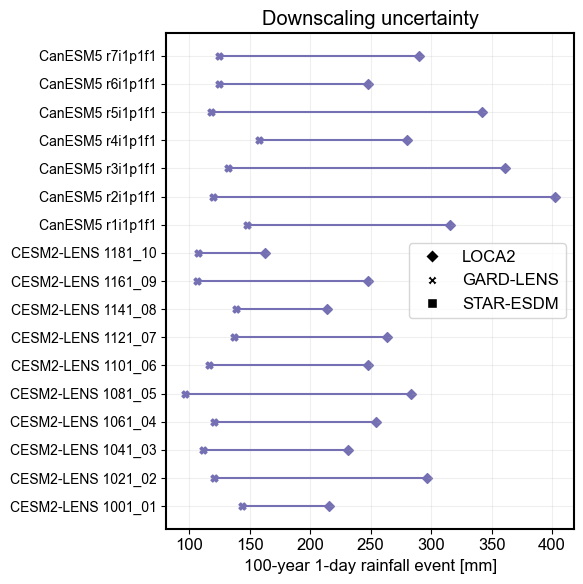

In [11]:
# Read all
metric_id = 'max_pr'
xlabel = "100-year 1-day rainfall event [mm]"
regrid_method = 'nearest'
proj_slice = '2050-2100'
hist_slice = '1950-2014'
return_period = 100

# Read
city = 'nyc'
file_name = f"{city}_{metric_id}_{proj_slice}_{hist_slice}_{return_period}rl_{regrid_method}.csv"
df_all = pd.read_csv(f"{project_data_path}/extreme_value/cities/loca_grid/{file_name}")

# Plot
plot_col = "100yr_return_level"

fig, ax = plt.subplots(figsize=(6,6))

pu.plot_ds_differences(df_all[df_all['ssp'] == 'ssp370'], plot_col, xlabel, ax=ax, ssp_legend=False)

plt.tight_layout()
plt.savefig('../figs/nyc_example_ds_uncertainty.png', dpi=300)

# pu.plot_decomp_qual(df = df_all[df_all['ssp'] != 'historical'],
#                  plot_col = plot_col,
#                  xlabel = xlabel)

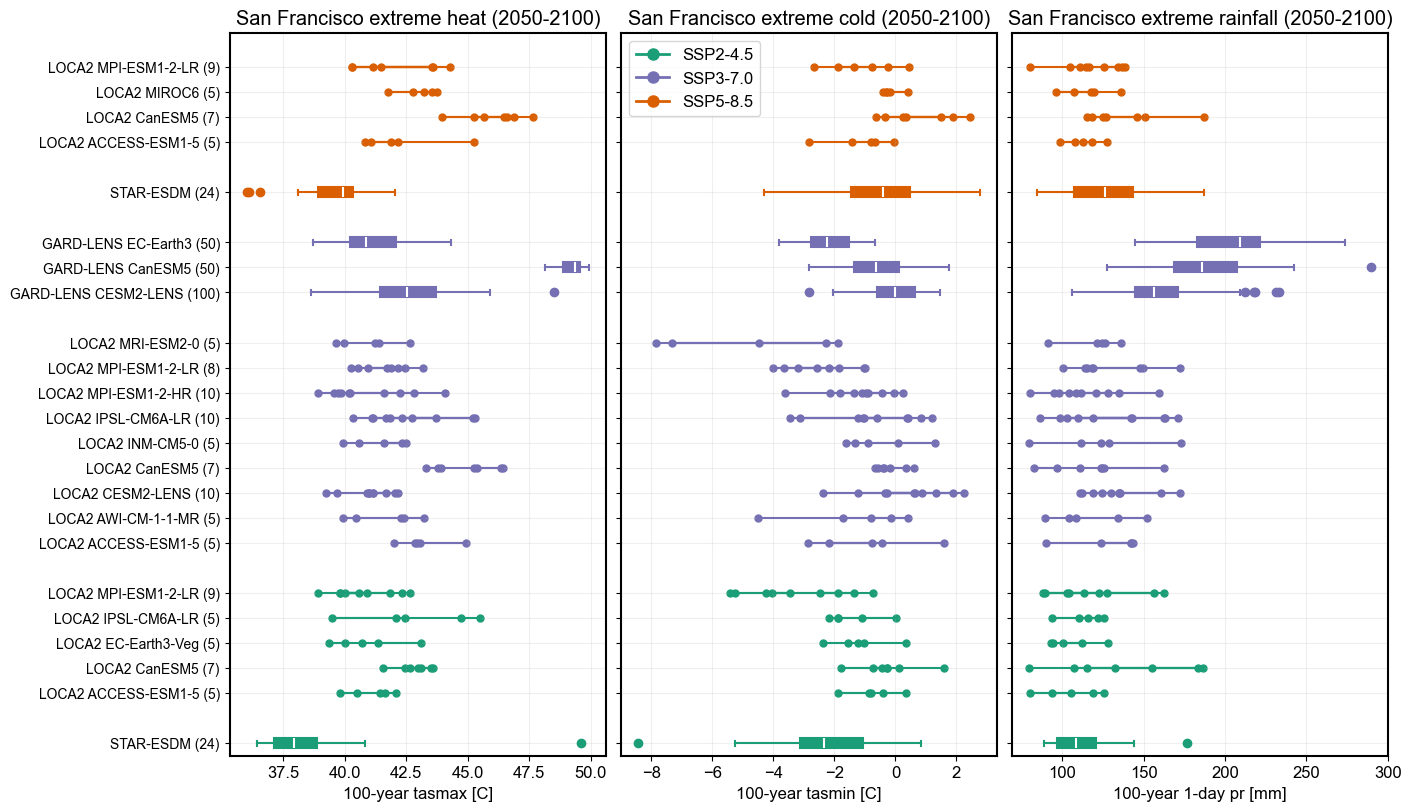

In [7]:
fig, axs = plt.subplots(1,3, figsize=(14,8), sharey=True, layout='constrained')

pu.plot_city('sanfrancisco', 'max_tasmax', 100, axs[0], "100-year tasmax [C]", "San Francisco extreme heat (2050-2100)", False, min_members=5, limits=[0,50])
pu.plot_city('sanfrancisco', 'min_tasmin', 100, axs[1], "100-year tasmin [C]", "San Francisco extreme cold (2050-2100)", True, min_members=5)
pu.plot_city('sanfrancisco', 'max_pr', 100, axs[2], "100-year 1-day pr [mm]", "San Francisco extreme rainfall (2050-2100)", False, min_members=5)

plt.savefig('../figs/sanfrancisco_example_all.pdf')

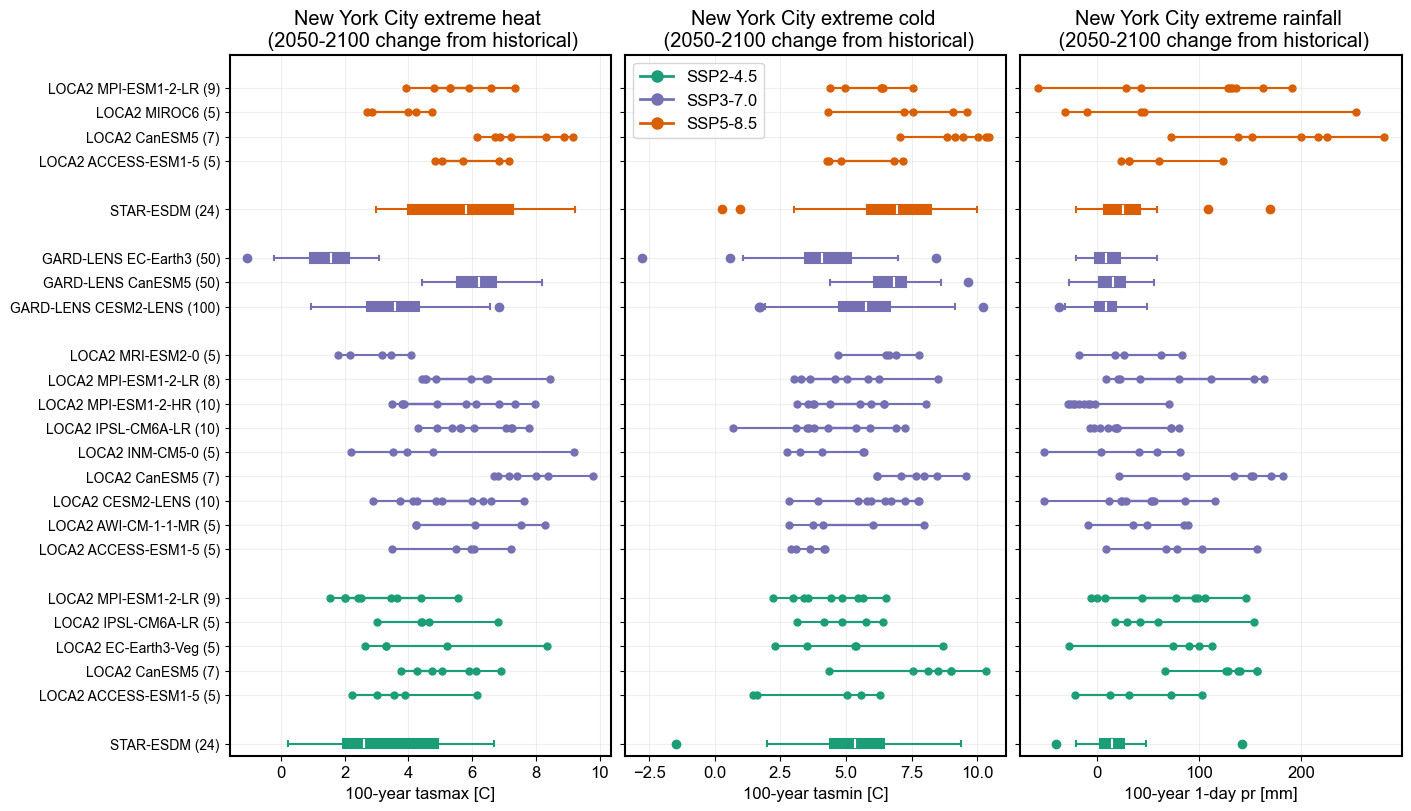

In [5]:
fig, axs = plt.subplots(1,3, figsize=(14,8), sharey=True, layout='constrained')

pu.plot_city('nyc', 'max_tasmax', 100, axs[0], "100-year tasmax [C]", "New York City extreme heat \n (2050-2100 change from historical)", False, min_members=5, limits=[-15,15], plot_diff=True)
pu.plot_city('nyc', 'min_tasmin', 100, axs[1], "100-year tasmin [C]", "New York City extreme cold \n (2050-2100 change from historical)", True, min_members=5, plot_diff=True)
pu.plot_city('nyc', 'max_pr', 100, axs[2], "100-year 1-day pr [mm]", "New York City extreme rainfall \n (2050-2100 change from historical)", False, min_members=5, plot_diff=True)

plt.savefig('../figs/nyc_example_all_change.pdf')

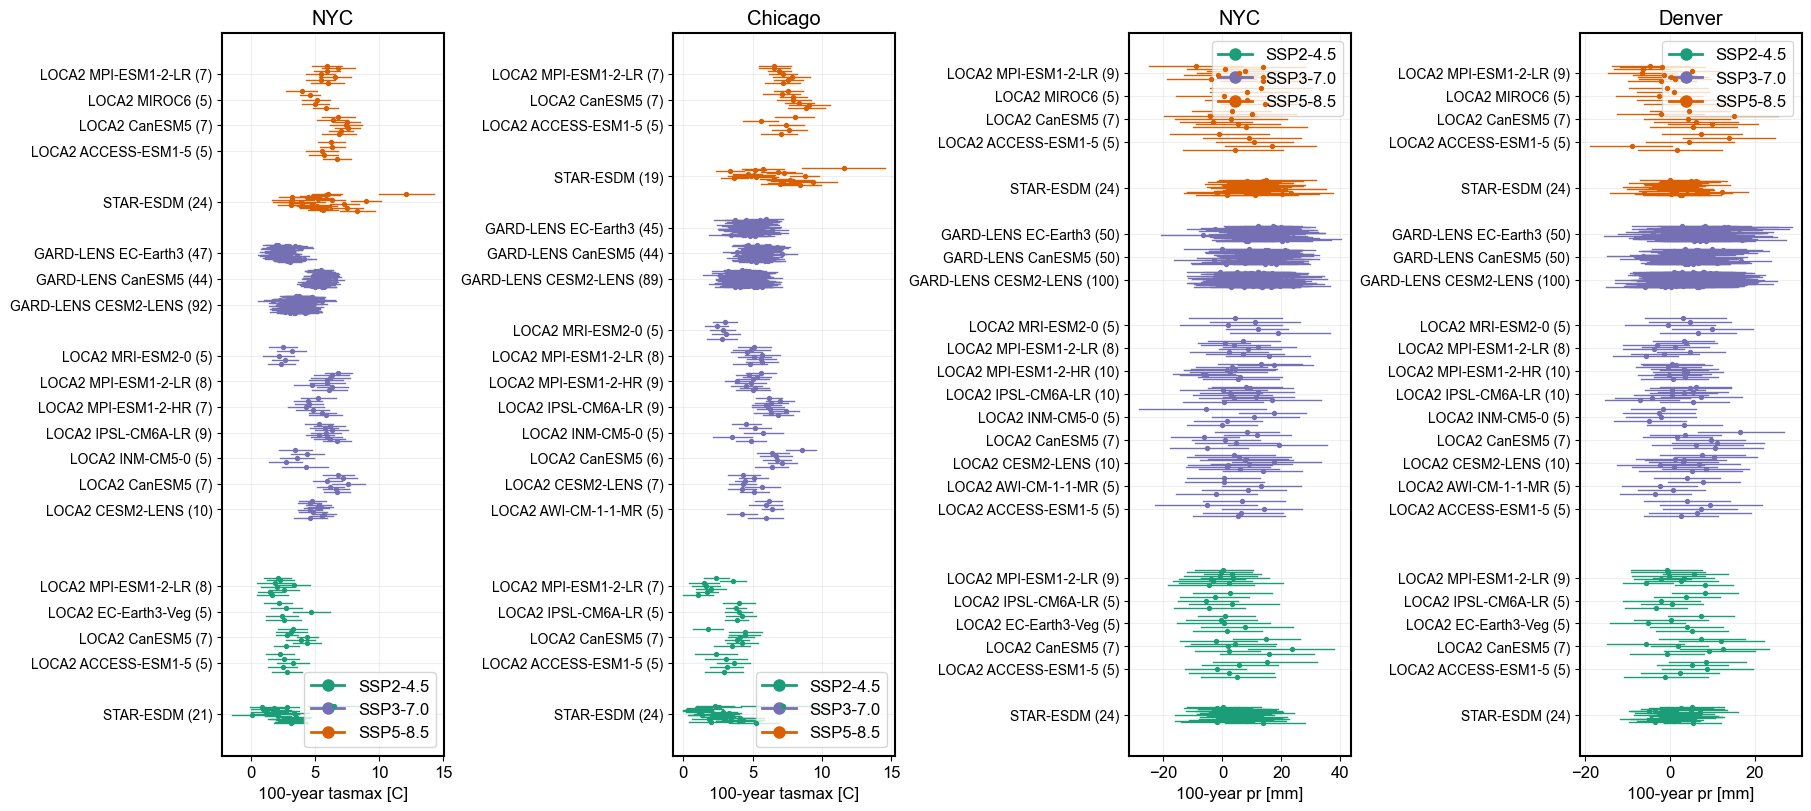

In [14]:
## Bayesian
store_path = f"{project_data_path}/extreme_value/cities/original_grid/bayes_combined/"

stationary = False
stationary_string = "stat" if stationary else "nonstat"

prior_identifier = "shape_sigma_02"
year = None
change_identifier = "_change_2015-2100"

fig, axs = plt.subplots(1,4, figsize=(18,8), sharey=False, layout='constrained')

# NYC heat
city = 'nyc'
metric_id = 'max_tasmax'

df = pd.read_csv(f"{store_path}/{city}_{metric_id}_{stationary_string}_{prior_identifier}{change_identifier}.csv")
df_plot = df[(df["ssp"] != "historical") & df["rhat_good"]]
if year is not None:
    df_plot = df_plot[df_plot["time"] == year]

plot_boxplot_all_bayes(df = df_plot, 
                       plot_col = '100yr_return_level',
                       xlabel = '100-year tasmax [C]',
                       title = 'NYC',
                       min_members = 5,
                       lw = 1,
                       s = 8,
                       idx_step = 1,
                       ax=axs[0]
                      )
# axs[0].set_xlim([37,55])

# Chicago heat
city = 'chicago'
metric_id = 'max_tasmax'

df = pd.read_csv(f"{store_path}/{city}_{metric_id}_{stationary_string}_{prior_identifier}{change_identifier}.csv")
df_plot = df[(df["ssp"] != "historical") & df["rhat_good"]]
if year is not None:
    df_plot = df_plot[df_plot["time"] == year]
    
plot_boxplot_all_bayes(df = df_plot, 
                       plot_col = '100yr_return_level',
                       xlabel = '100-year tasmax [C]',
                       title = 'Chicago',
                       min_members = 5,
                       lw = 1,
                       s = 8,
                       idx_step = 1,
                       ax=axs[1]
                      )
# axs[1].set_xlim([37,55])

# NYC pr
city = 'nyc'
metric_id = 'max_pr'

df = pd.read_csv(f"{store_path}/{city}_{metric_id}_{stationary_string}_{prior_identifier}{change_identifier}.csv")
df_plot = df[(df["ssp"] != "historical") & df["rhat_good"]]
if year is not None:
    df_plot = df_plot[df_plot["time"] == year]
    
plot_boxplot_all_bayes(df = df_plot, 
                       plot_col = '100yr_return_level',
                       xlabel = '100-year pr [mm]',
                       title = 'NYC',
                       min_members = 5,
                       lw = 1,
                       s = 8,
                       idx_step = 1,
                       ax=axs[2]
                      )
# axs[2].set_xlim([50,600])

# Denver pr
city = 'denver'
metric_id = 'max_pr'

df = pd.read_csv(f"{store_path}/{city}_{metric_id}_{stationary_string}_{prior_identifier}{change_identifier}.csv")
df_plot = df[(df["ssp"] != "historical") & df["rhat_good"]]
if year is not None:
    df_plot = df_plot[df_plot["time"] == year]
    
plot_boxplot_all_bayes(df = df_plot, 
                       plot_col = '100yr_return_level',
                       xlabel = '100-year pr [mm]',
                       title = 'Denver',
                       min_members = 5,
                       lw = 1,
                       s = 8,
                       idx_step = 1,
                       ax=axs[3]
                      )
# axs[3].set_xlim([30,200])

plt.show()

In [10]:
def plot_conf_intvs(
    df, plot_col, positions, color, ax, limits=None, lw=1.5, s=20
):
    # Filter data below limits if desired
    if limits is not None:
        data = df[(df[plot_col] < limits[1]) & (df[plot_col] > limits[0])]
    else:
        data = df.copy()

    # Point for median
    ax.scatter(
        x=[data[data["quantile"] == "0.5"][plot_col].values[0]],
        y=positions,
        c=color,
        s=s,
        zorder=6,
    )

    # Line for 95% CI
    ax.plot(
        [
            data[data["quantile"] == "0.025"][plot_col].values[0],
            data[data["quantile"] == "0.975"][plot_col].values[0],
        ],
        [positions, positions],
        color=color,
        linewidth=lw,
        zorder=4,
    )


In [11]:
def plot_boxplot_all_bayes(
    df,
    plot_col,
    xlabel,
    title,
    ax=None,
    min_members=5,
    limits=None,
    legend=True,
    lw=1.5,
    s=20,
    idx_step=1,
):
    # Create a new figure and axis if none are provided
    if ax is None:
        fig, ax = plt.subplots(figsize=(4, 10))

    idx = 0
    ylabels = []
    yskip = []

    # Separate by SSPs first
    for ssp in ssps:
        # STAR-ESDM is separate
        ensemble = "STAR-ESDM"
        data = df[(df["ensemble"] == ensemble) & (df["ssp"] == ssp)]
        # Separate
        yskip.append(idx)
        ylabels.append("")
        idx += idx_step
        # Plot
        gcms = data["gcm"].unique()
        if len(gcms) > 0:
            idxx_steps = np.linspace(-idx_step / 3, idx_step / 3, len(gcms))
            for idxx, gcm in enumerate(gcms):
                plot_conf_intvs(
                    data[data["gcm"] == gcm],
                    plot_col=plot_col,
                    positions=[idx + idxx_steps[idxx]],
                    color=ssp_colors[ssp],
                    ax=ax,
                    lw=lw,
                    s=s,
                    limits=limits,
                )
            idx += idx_step
            ylabels.append(f"{ensemble} ({len(data['gcm'].unique())})")

        # Loop through 'large' ensembles
        for ensemble in ["LOCA2", "GARD-LENS"]:
            # Filter minimum members
            df_sel = df[(df["ensemble"] == ensemble) & (df["ssp"] == ssp)]
            min_filter = (
                df_sel[df_sel["quantile"] == "mean"]
                .groupby("gcm")[plot_col]
                .count()
                >= min_members
            )
            if min_filter.sum() > 0:
                # Add space
                yskip.append(idx)
                ylabels.append("")
                idx += idx_step

                # Loop through GCMs
                gcms = min_filter[min_filter].index
                for gcm in gcms:
                    data = df_sel[df_sel["gcm"] == gcm]
                    members = data["member"].unique()
                    idxx_steps = np.linspace(
                        -idx_step / 3, idx_step / 3, len(members)
                    )
                    for idxx, member in enumerate(members):
                        plot_conf_intvs(
                            data[data["member"] == member],
                            plot_col=plot_col,
                            positions=idx + idxx_steps[idxx],
                            color=ssp_colors[ssp],
                            ax=ax,
                            lw=lw,
                            s=s,
                            limits=limits,
                        )
                    idx += idx_step
                    ylabels.append(
                        f"{ensemble} {gcm} ({len(data['member'].unique())})"
                    )

    # Legend
    if legend:
        legend_elements = [
            Line2D(
                [0],
                [0],
                color=ssp_colors[ssp],
                marker="o",
                markerfacecolor=ssp_colors[ssp],
                markersize=8,
                lw=2,
                label=ssp_labels[ssp],
            )
            for ssp in ssp_colors.keys()
        ]
        ax.legend(handles=legend_elements)

    # Tidy
    ax.grid(alpha=0.2)
    ax.set_xlabel(xlabel)
    ax.set_title(title)
    ax.set_yticks(
        np.delete(np.arange(len(ylabels)), yskip),
        np.delete(ylabels, yskip),
        fontsize=10,
    )


In [13]:
ssp_colors = {
    "ssp245": "#1b9e77",
    "ssp370": "#7570b3",
    "ssp585": "#d95f02",
}
ssp_labels = {
    "ssp245": "SSP2-4.5",
    "ssp370": "SSP3-7.0",
    "ssp585": "SSP5-8.5",
}

In [118]:
# # Overall plot info
# city = 'nyc'
# regrid_method = 'nearest'
# proj_slice = '2050-2100'
# hist_slice = '1950-2014'
# return_period = 100
# plot_col = "100yr_return_level"

# fig, axs = plt.subplots(1, 2, figsize=(12,6), sharey=True)

# # Plot tasmax
# ax = axs[0]
# metric_id = 'max_tasmax'
# xlabel = "100-year tasmax [C]"
# title = 'Extreme heat (2050-2100)'

# file_name = f"{city}_{metric_id}_{proj_slice}_{hist_slice}_{return_period}rl_{regrid_method}.csv"
# df_all = pd.read_csv(f"{project_data_path}/extreme_value/cities/loca_grid/{file_name}")

# pu.plot_all_boxplots(df = df_all[df_all['ssp'] != 'historical'], # drop historical
#                      plot_col = plot_col,
#                      xlabel = xlabel,
#                      title = title,
#                      legend = True,
#                      ax = ax)

# # Plot tasmax
# ax = axs[1]
# metric_id = 'min_tasmin'
# xlabel = "100-year tasmin [C]"
# title = 'Extreme cold (2050-2100)'

# file_name = f"{city}_{metric_id}_{proj_slice}_{hist_slice}_{return_period}rl_{regrid_method}.csv"
# df_all = pd.read_csv(f"{project_data_path}/extreme_value/cities/loca_grid/{file_name}")

# pu.plot_all_boxplots(df = df_all[df_all['ssp'] != 'historical'], # drop historical
#                      plot_col = plot_col,
#                      xlabel = xlabel,
#                      title = title,
#                      legend = False,
#                      ax = ax)

# plt.show()

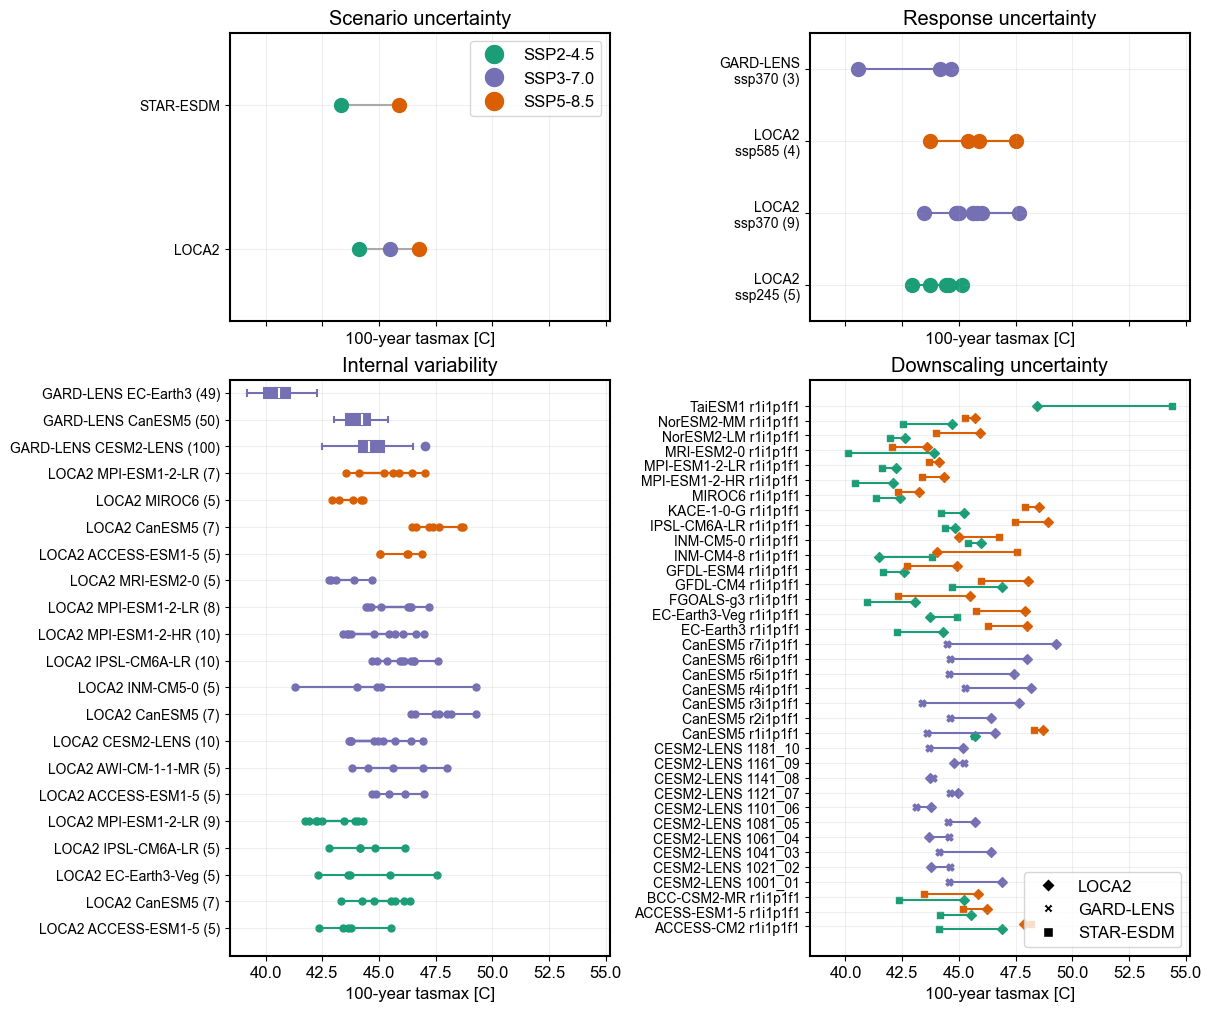

In [5]:
# Read all
metric_id = 'max_tasmax'
xlabel = "100-year tasmax [C]"
regrid_method = 'nearest'
proj_slice = '2050-2100'
hist_slice = '1950-2014'
return_period = 100

# Read
city = 'nyc'
file_name = f"{city}_{metric_id}_{proj_slice}_{hist_slice}_{return_period}rl_{regrid_method}.csv"
df_all = pd.read_csv(f"{project_data_path}/extreme_value/cities/loca_grid/{file_name}")

# Plot
plot_col = "100yr_return_level"

pu.plot_decomp_qual(df = df_all[df_all['ssp'] != 'historical'],
                 plot_col = plot_col,
                 xlabel = xlabel)

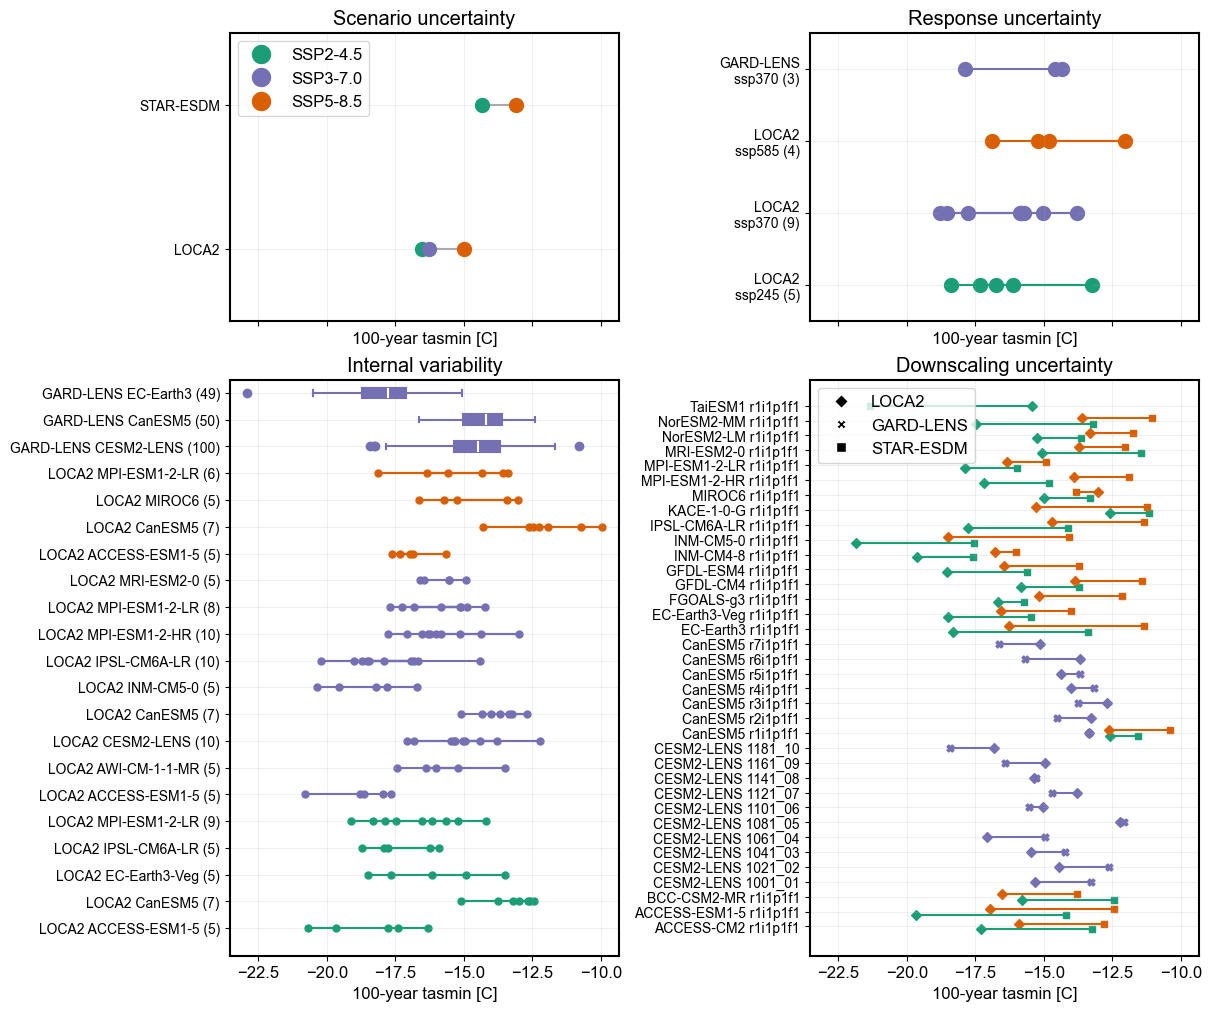

In [6]:
# Read all
metric_id = 'min_tasmin'
xlabel = "100-year tasmin [C]"
regrid_method = 'nearest'
proj_slice = '2050-2100'
hist_slice = '1950-2014'
return_period = 100

# Read
city = 'nyc'
file_name = f"{city}_{metric_id}_{proj_slice}_{hist_slice}_{return_period}rl_{regrid_method}.csv"
df_all = pd.read_csv(f"{project_data_path}/extreme_value/cities/loca_grid/{file_name}")

# Plot
plot_col = "100yr_return_level"

pu.plot_decomp_qual(df = df_all[df_all['ssp'] != 'historical'],
                 plot_col = plot_col,
                 xlabel = xlabel)

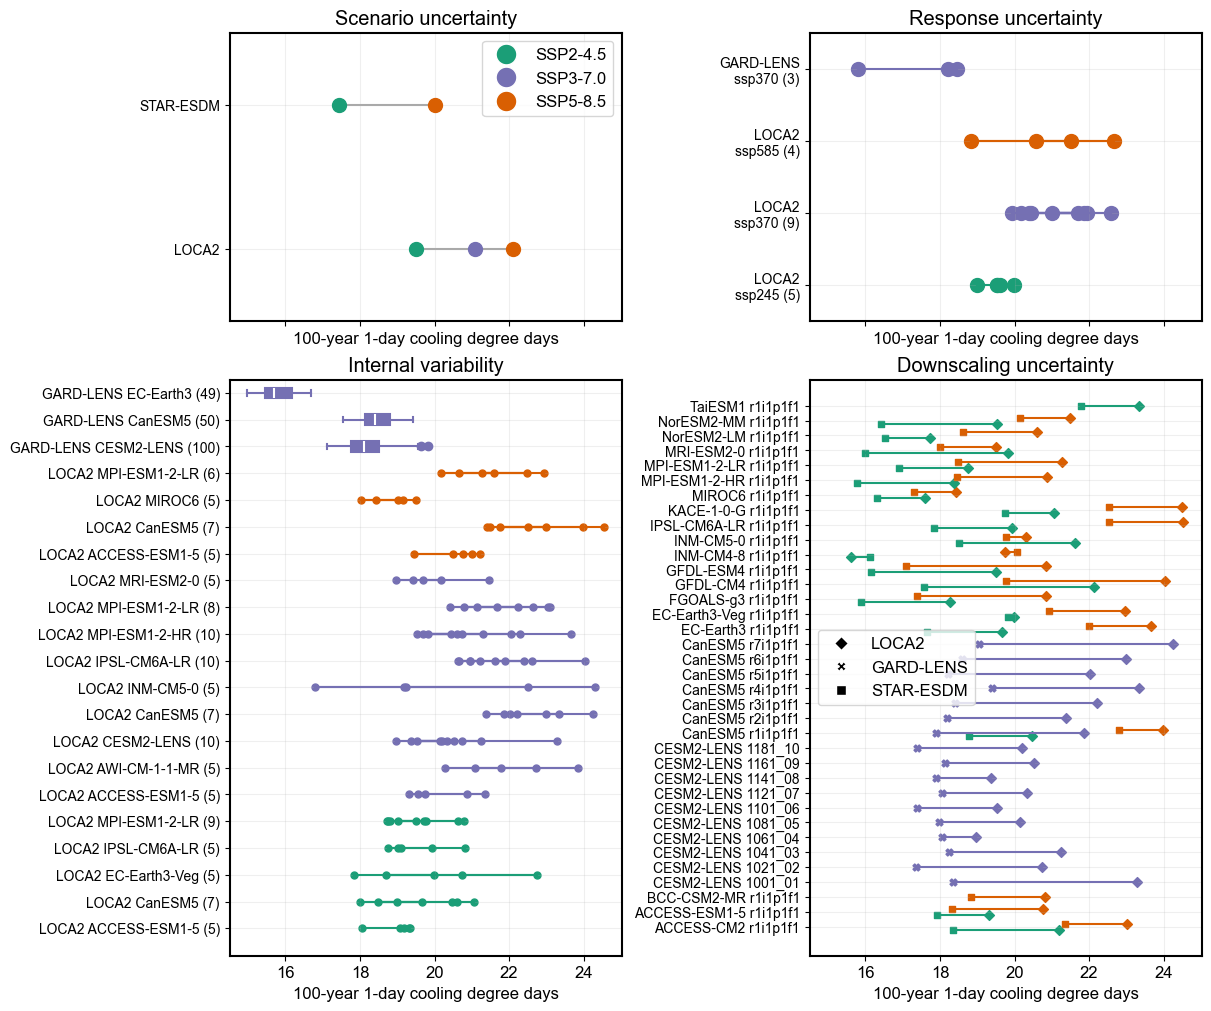

In [7]:
# Read all
metric_id = 'max_cdd'
xlabel = "100-year 1-day cooling degree days"
regrid_method = 'nearest'
proj_slice = '2050-2100'
hist_slice = '1950-2014'
return_period = 100

# Read
city = 'nyc'
file_name = f"{city}_{metric_id}_{proj_slice}_{hist_slice}_{return_period}rl_{regrid_method}.csv"
df_all = pd.read_csv(f"{project_data_path}/extreme_value/cities/loca_grid/{file_name}")

# Plot
plot_col = "100yr_return_level"

pu.plot_decomp_qual(df = df_all[df_all['ssp'] != 'historical'],
                 plot_col = plot_col,
                 xlabel = xlabel)

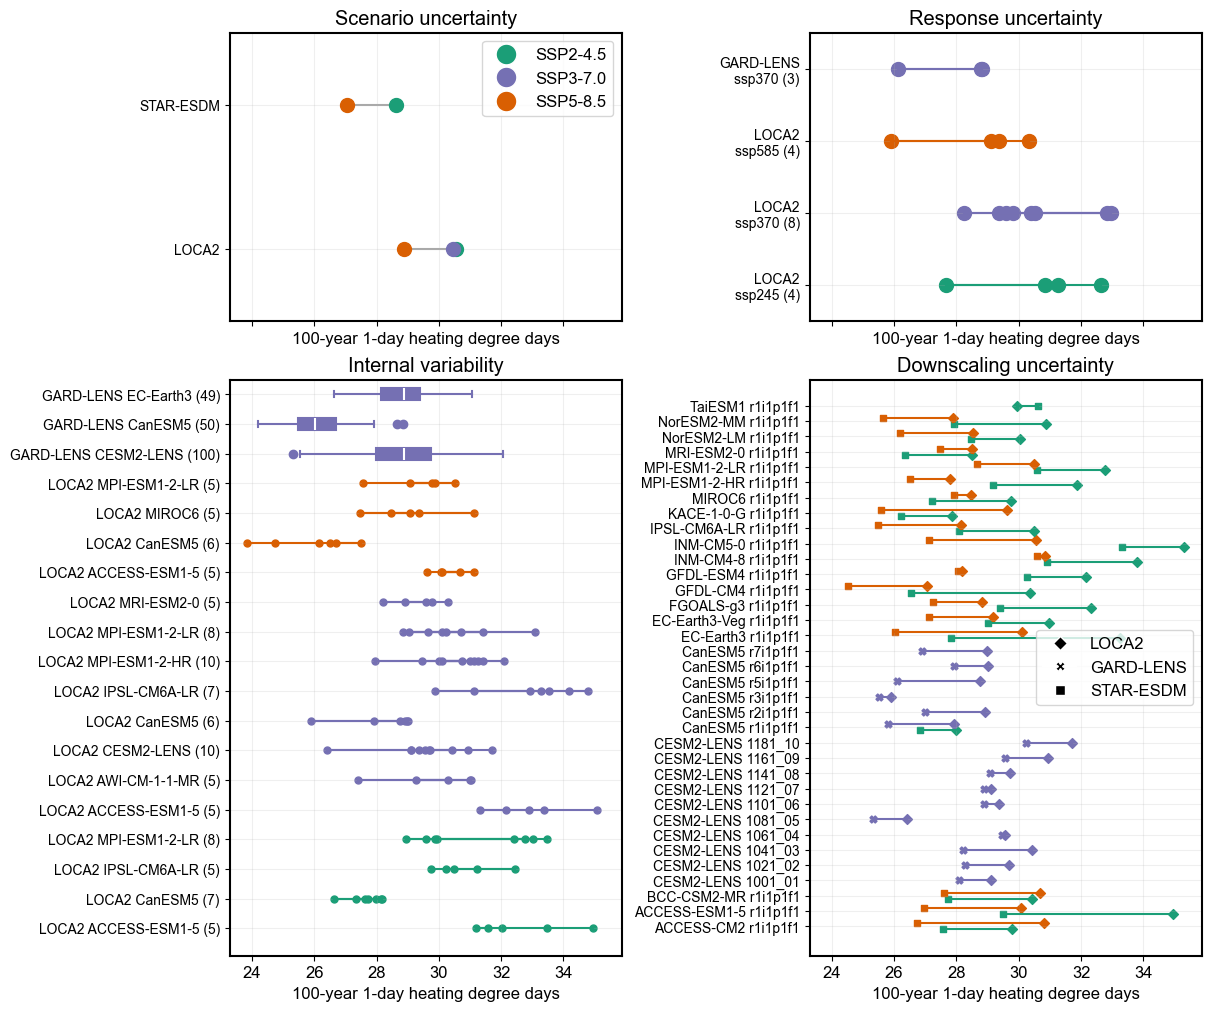

In [8]:
# Read all
metric_id = 'max_hdd'
xlabel = "100-year 1-day heating degree days"
regrid_method = 'nearest'
proj_slice = '2050-2100'
hist_slice = '1950-2014'
return_period = 100

# Read
city = 'nyc'
file_name = f"{city}_{metric_id}_{proj_slice}_{hist_slice}_{return_period}rl_{regrid_method}.csv"
df_all = pd.read_csv(f"{project_data_path}/extreme_value/cities/loca_grid/{file_name}")

# Plot
plot_col = "100yr_return_level"

pu.plot_decomp_qual(df = df_all[df_all['ssp'] != 'historical'],
                 plot_col = plot_col,
                 xlabel = xlabel)

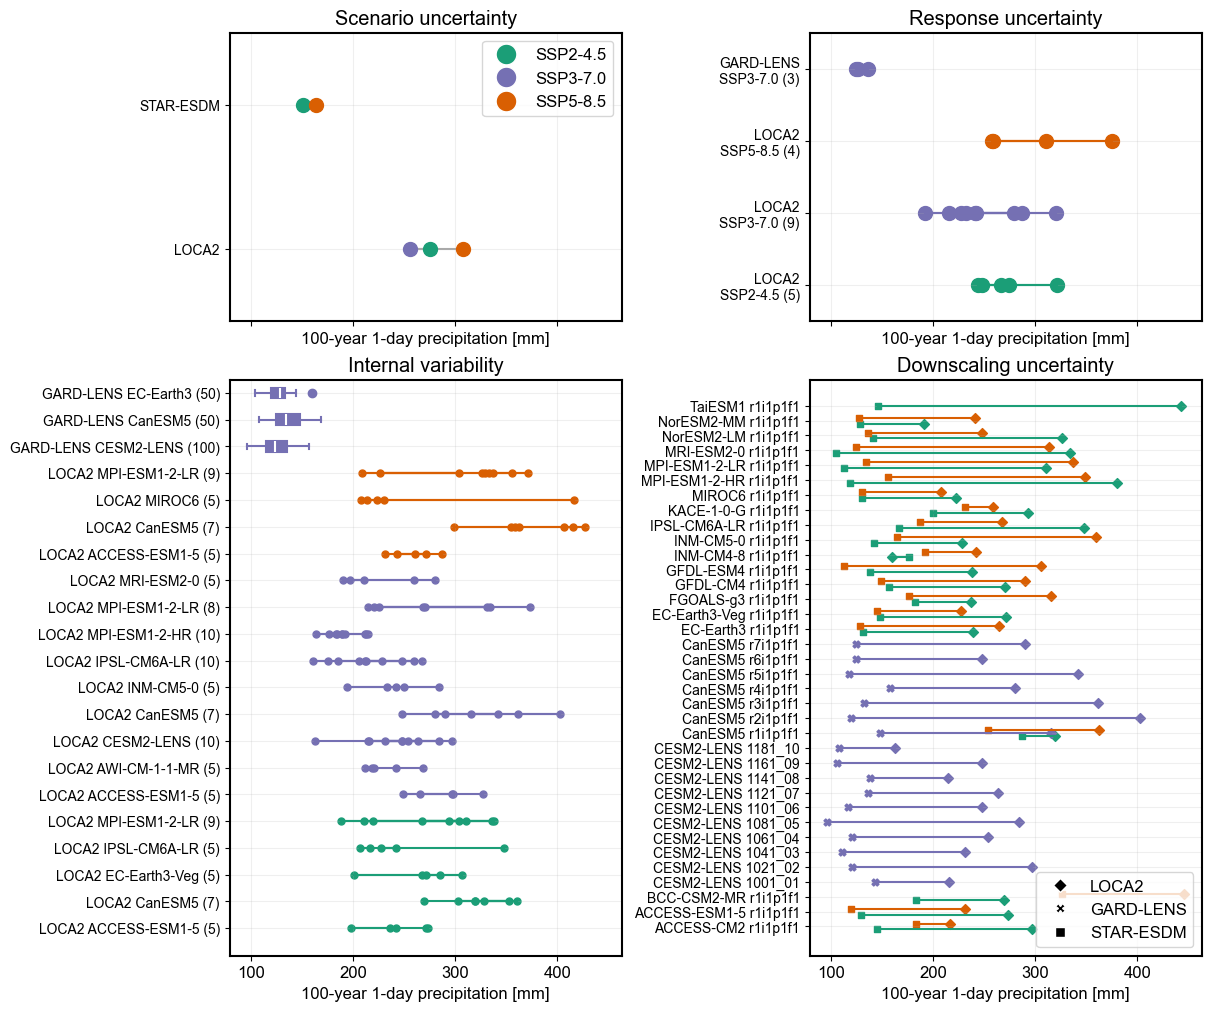

In [13]:
# Read all
metric_id = 'max_pr'
xlabel = "100-year 1-day precipitation [mm]"
regrid_method = 'nearest'
proj_slice = '2050-2100'
hist_slice = '1950-2014'
return_period = 100

# Read
city = 'nyc'
file_name = f"{city}_{metric_id}_{proj_slice}_{hist_slice}_{return_period}rl_{regrid_method}.csv"
df_all = pd.read_csv(f"{project_data_path}/extreme_value/cities/loca_grid/{file_name}")

# Plot
plot_col = "100yr_return_level"

pu.plot_decomp_qual(df = df_all[df_all['ssp'] != 'historical'],
                 plot_col = plot_col,
                 xlabel = xlabel)